# MGTC28 Final Assignment
### Kenvue Data Cleaning & Analysis

For this assignment, we will be using the datasets provided by Kenvue,
The datasets are stored in .csv files, holding different information in 5 data sets (Customer DC Inventory, Factory POS $, Ecomm POS $, Total Sales, Total Trade Spend):

- POS Factory $ = POS Revenue (i.e., Retailer Revenue)
- Need State = Grouping/categorizing of different customers needs 
- Total Sales = All sales across customers
- DC Amount = How much inventory at distribution centers
- Store Amt on Hand = How much inventory at a store level
- Total Trade Spend = the amount of money spent to promote that product

By: Jeff Ye (1007133601) & Yousuf Zaidi

In [5]:
# Importing Libraries (PANDAS,Seaborn & Statsmodel) and CSV Files

import pandas as pd

import seaborn as sns

import statsmodels.api as sm

import matplotlib.pyplot as plt

import statsmodels.api as sm


dfDC = pd.read_csv('E:\Downloads\kenvue_data\Customer DC Inventory - UTSC Lecture.csv')
dfFactory = pd.read_csv('E:\Downloads\kenvue_data\Factory POS $ - UTSC Lecture.csv')
dfECOM = pd.read_csv('E:\Downloads\kenvue_data\Total Ecomm POS (Factory $) - UTSC Lecture.csv')
dfSales = pd.read_csv('E:\Downloads\kenvue_data\Total Sales - UTSC Lecture.csv')
dfTradeSpend = pd.read_csv('E:\Downloads\kenvue_data\Total Trade Spend.csv')

In [6]:
# Compare Trade Spend Vs Sales for each product in each season

## Categorize Trade Spend for Each Need State into Seasons
def categorize_season(week):
    if 1 <= week <= 13 or 50 <= week <= 52:
        return 'Winter'
    elif 15 <= week <= 26:
        return 'Spring'
    elif 27 <= week <= 38:
        return 'Summer'
    else:
        return 'Fall'
    
dfTradeSpend["Season"] = dfTradeSpend["Fiscal Week"].apply(categorize_season)

NSTS_dfs = {}
for Need_State in range(1, 6):
    NSTS_col = f'Need State {Need_State}'
    NSTS_df = dfTradeSpend.groupby(['Fiscal Year', 'Season'])[NSTS_col].sum().reset_index()
    NSTS_dfs[NSTS_col] = NSTS_df
    
print(NSTS_dfs["Need State 1"])

#Categorize Total Sales for Each Need State into Seasons

dfSales["Season"] = dfSales["Fiscal Week"].apply(categorize_season)

NSS_dfs = {}
for Need_State in range(1, 6):
    NSS_col = f'Need State {Need_State}'
    NSS_df = dfSales.groupby(['Fiscal Year', 'Season'])[NSS_col].sum().reset_index()
    NSS_dfs[NSS_col] = NSS_df
    
print(NSS_dfs["Need State 1"])

    Fiscal Year  Season  Need State 1
0          2021    Fall        166126
1          2021  Spring        119572
2          2021  Summer        111164
3          2021  Winter        202110
4          2022    Fall        124812
5          2022  Spring        122861
6          2022  Summer        138197
7          2022  Winter        160802
8          2023    Fall         84661
9          2023  Spring        126385
10         2023  Summer        124833
11         2023  Winter        113439
    Fiscal Year  Season  Need State 1
0          2021    Fall    5497671.75
1          2021  Spring    7155114.75
2          2021  Summer    6262401.75
3          2021  Winter   10824807.00
4          2022    Fall    6682919.25
5          2022  Spring    8407067.25
6          2022  Summer    6163911.00
7          2022  Winter    9993092.25
8          2023    Fall    3448224.75
9          2023  Spring    7903252.50
10         2023  Summer    6856119.00
11         2023  Winter    6837707.25


In [7]:
# Assuming NSTS_dfs["Need State 1"] and NSS_dfs["Need State 1"] are your DataFrames
trade_spend_df = NSTS_dfs["Need State 1"]
sales_df = NSS_dfs["Need State 1"]

# Merge the DataFrames on Fiscal Year and Season
merged_df = pd.merge(trade_spend_df, sales_df, on=['Fiscal Year', 'Season'], suffixes=('_TradeSpend', '_Sales'))


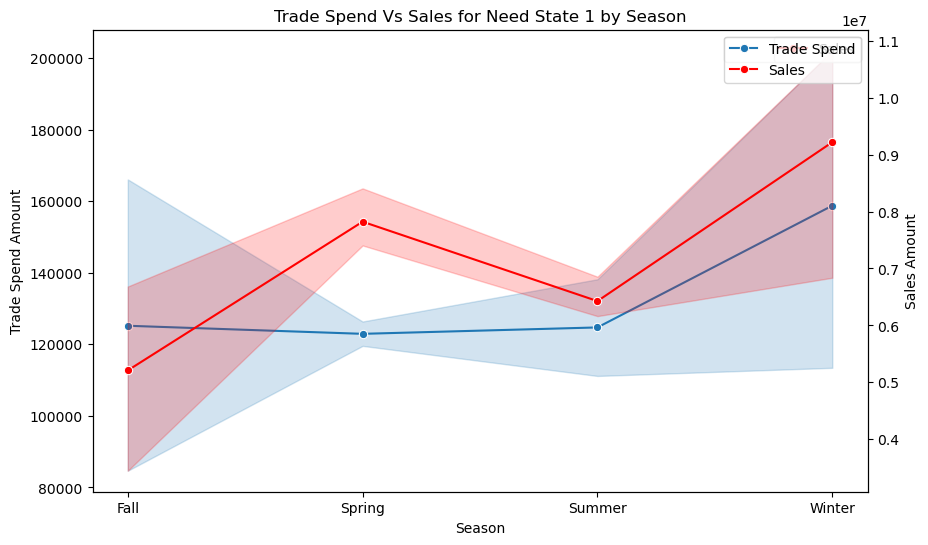

In [9]:
plt.figure(figsize=(10, 6))

# Create the first y-axis for Trade Spend for Need State 1
ax = sns.lineplot(data=merged_df, x='Season', y='Need State 1_TradeSpend', marker='o', label='Trade Spend')
ax.set_ylabel('Trade Spend Amount')

# Create the second y-axis for Sales for Need State 1
ax2 = ax.twinx()
sns.lineplot(data=merged_df, x='Season', y='Need State 1_Sales', marker='o', label='Sales', color='r', ax=ax2)
ax2.set_ylabel('Sales Amount')

plt.title('Trade Spend Vs Sales for Need State 1 by Season')
ax.figure.legend(loc='upper right', bbox_to_anchor=(1, 1), bbox_transform=ax.transAxes)
plt.show()


In [96]:
# Example for Need State 1
data = merged_df[['Need State 1_TradeSpend', 'Need State 1_Sales']]
# Defining the independent variable (X) and dependent variable (y)
X = data['Need State 1_TradeSpend']
y = data['Need State 1_Sales']

# Adding a constant to the model (for intercept)
X = sm.add_constant(X)

# Building the OLS model
model = sm.OLS(y, X).fit()

# Viewing the summary of the model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:     Need State 1_Sales   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                     9.870
Date:                Mon, 27 Nov 2023   Prob (F-statistic):             0.0105
Time:                        22:15:39   Log-Likelihood:                -186.26
No. Observations:                  12   AIC:                             376.5
Df Residuals:                      10   BIC:                             377.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    1

/Users/yousuf03/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [11]:
# Merge the DataFrames for Need State 2
trade_spend_df_2 = NSTS_dfs["Need State 2"]
sales_df_2 = NSS_dfs["Need State 2"]

merged_df_2 = pd.merge(trade_spend_df_2, sales_df_2, on=['Fiscal Year', 'Season'], suffixes=('_TradeSpend', '_Sales'))


In [12]:
print(merged_df_2[['Need State 2_TradeSpend', 'Need State 2_Sales']].describe())

       Need State 2_TradeSpend  Need State 2_Sales
count                12.000000        1.200000e+01
mean             123764.250000        4.827497e+06
std               22588.801192        1.090674e+06
min               80830.000000        1.690270e+06
25%              113120.250000        4.759648e+06
50%              122855.500000        4.825093e+06
75%              132579.000000        5.566366e+06
max              169879.000000        5.814607e+06


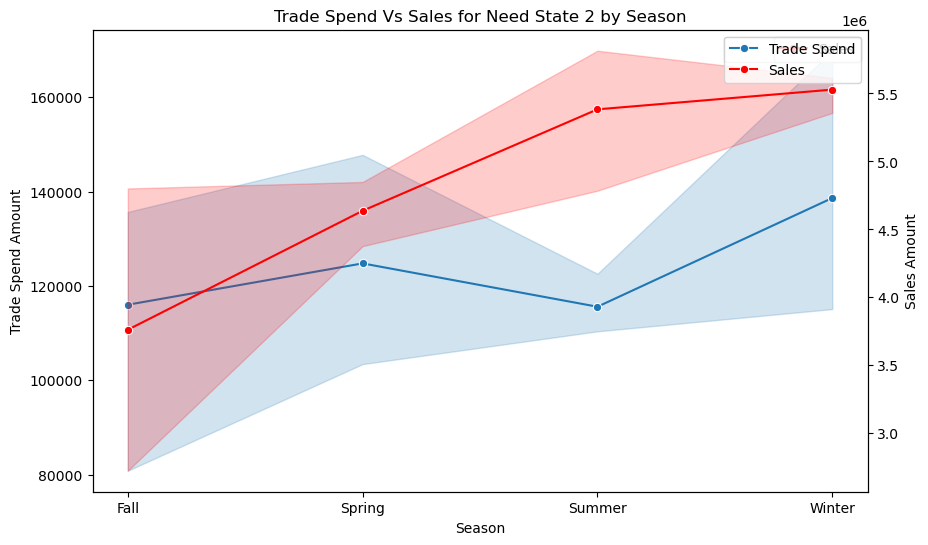

In [13]:
plt.figure(figsize=(10, 6))

# Create the first y-axis for Trade Spend
ax = sns.lineplot(data=merged_df_2, x='Season', y='Need State 2_TradeSpend', marker='o', label='Trade Spend')
ax.set_ylabel('Trade Spend Amount')

# Create the second y-axis for Sales
ax2 = ax.twinx()
sns.lineplot(data=merged_df_2, x='Season', y='Need State 2_Sales', marker='o', label='Sales', color='r', ax=ax2)
ax2.set_ylabel('Sales Amount')

plt.title('Trade Spend Vs Sales for Need State 2 by Season')
ax.figure.legend(loc='upper right', bbox_to_anchor=(1, 1), bbox_transform=ax.transAxes)
plt.show()


In [14]:
# Example for Need State 2
data = merged_df_2[['Need State 2_TradeSpend', 'Need State 2_Sales']]


In [15]:
# Defining the independent variable (X) and dependent variable (y)
X = data['Need State 2_TradeSpend']
y = data['Need State 2_Sales']

# Adding a constant to the model (for intercept)
X = sm.add_constant(X)

# Building the OLS model
model = sm.OLS(y, X).fit()

# Viewing the summary of the model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:     Need State 2_Sales   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.201
Method:                 Least Squares   F-statistic:                     3.761
Date:                Tue, 28 Nov 2023   Prob (F-statistic):             0.0812
Time:                        03:19:06   Log-Likelihood:                -181.42
No. Observations:                  12   AIC:                             366.8
Df Residuals:                      10   BIC:                             367.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    1

C:\Users\jeff13309\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [16]:
# Merge the DataFrames for Need State 3
trade_spend_df_3 = NSTS_dfs["Need State 3"]
sales_df_3 = NSS_dfs["Need State 3"]

merged_df_3 = pd.merge(trade_spend_df_3, sales_df_3, on=['Fiscal Year', 'Season'], suffixes=('_TradeSpend', '_Sales'))


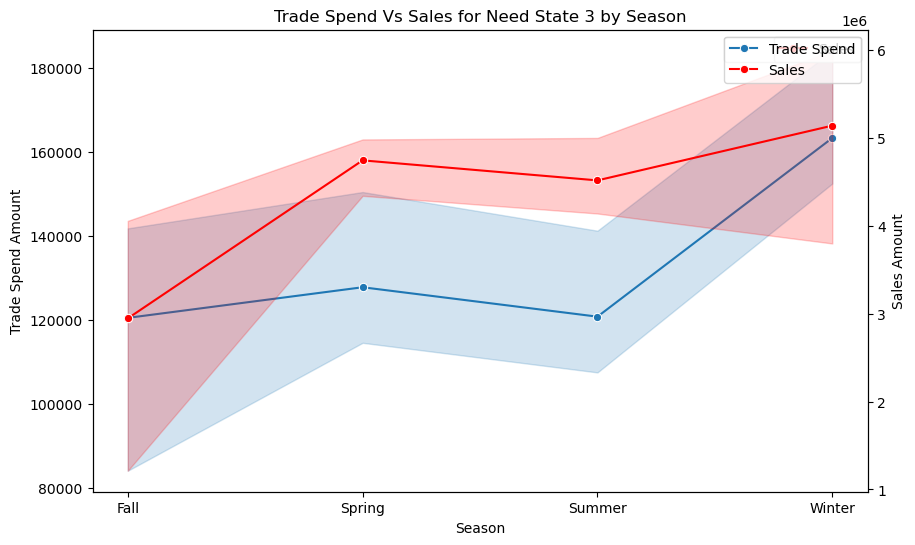

In [17]:
plt.figure(figsize=(10, 6))

# Create the first y-axis for Trade Spend
ax = sns.lineplot(data=merged_df_3, x='Season', y='Need State 3_TradeSpend', marker='o', label='Trade Spend')
ax.set_ylabel('Trade Spend Amount')

# Create the second y-axis for Sales
ax2 = ax.twinx()
sns.lineplot(data=merged_df_3, x='Season', y='Need State 3_Sales', marker='o', label='Sales', color='r', ax=ax2)
ax2.set_ylabel('Sales Amount')

plt.title('Trade Spend Vs Sales for Need State 3 by Season')
ax.figure.legend(loc='upper right', bbox_to_anchor=(1, 1), bbox_transform=ax.transAxes)
plt.show()

In [18]:
# Example for Need State 3
data = merged_df_3[['Need State 3_TradeSpend', 'Need State 3_Sales']]
# Defining the independent variable (X) and dependent variable (y)
X = data['Need State 3_TradeSpend']
y = data['Need State 3_Sales']

# Adding a constant to the model (for intercept)
X = sm.add_constant(X)

# Building the OLS model
model = sm.OLS(y, X).fit()

# Viewing the summary of the model
print(model.summary())
data = merged_df_3[['Need State 3_TradeSpend', 'Need State 3_Sales']]

                            OLS Regression Results                            
Dep. Variable:     Need State 3_Sales   R-squared:                       0.298
Model:                            OLS   Adj. R-squared:                  0.228
Method:                 Least Squares   F-statistic:                     4.246
Date:                Tue, 28 Nov 2023   Prob (F-statistic):             0.0663
Time:                        03:19:30   Log-Likelihood:                -182.55
No. Observations:                  12   AIC:                             369.1
Df Residuals:                      10   BIC:                             370.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    1

C:\Users\jeff13309\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [19]:
# Merge the DataFrames for Need State 4
trade_spend_df_4 = NSTS_dfs["Need State 4"]
sales_df_4 = NSS_dfs["Need State 4"]

merged_df_4 = pd.merge(trade_spend_df_4, sales_df_4, on=['Fiscal Year', 'Season'], suffixes=('_TradeSpend', '_Sales'))



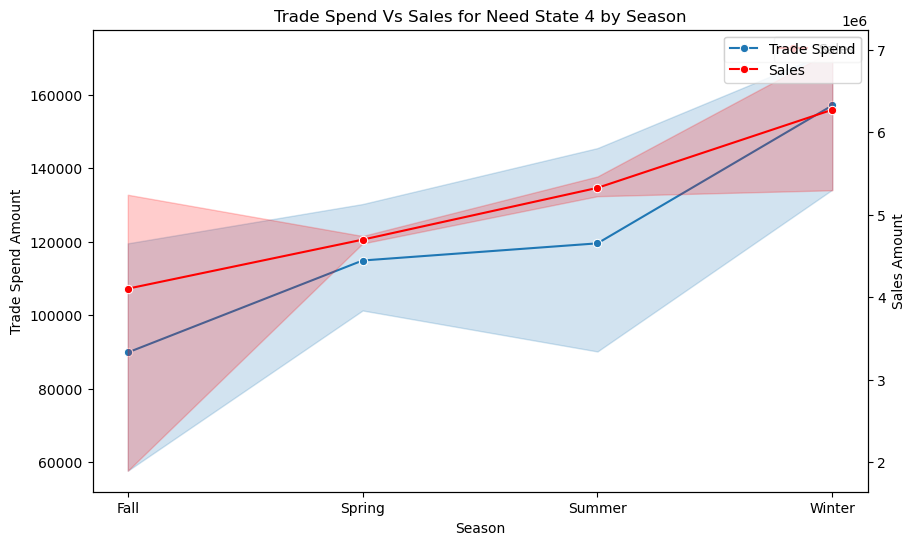

In [21]:
plt.figure(figsize=(10, 6))

# Create the first y-axis for Trade Spend
ax = sns.lineplot(data=merged_df_4, x='Season', y='Need State 4_TradeSpend', marker='o', label='Trade Spend')
ax.set_ylabel('Trade Spend Amount')

# Create the second y-axis for Sales
ax2 = ax.twinx()
sns.lineplot(data=merged_df_4, x='Season', y='Need State 4_Sales', marker='o', label='Sales', color='r', ax=ax2)
ax2.set_ylabel('Sales Amount')

plt.title('Trade Spend Vs Sales for Need State 4 by Season')
ax.figure.legend(loc='upper right', bbox_to_anchor=(1, 1), bbox_transform=ax.transAxes)
plt.show()

In [22]:
# Example for Need State 4
data = merged_df_4[['Need State 4_TradeSpend', 'Need State 4_Sales']]
# Defining the independent variable (X) and dependent variable (y)
X = data['Need State 4_TradeSpend']
y = data['Need State 4_Sales']

# Adding a constant to the model (for intercept)
X = sm.add_constant(X)

# Building the OLS model
model = sm.OLS(y, X).fit()

# Viewing the summary of the model
print(model.summary())
data = merged_df_4[['Need State 4_TradeSpend', 'Need State 4_Sales']]

                            OLS Regression Results                            
Dep. Variable:     Need State 4_Sales   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     21.77
Date:                Tue, 28 Nov 2023   Prob (F-statistic):           0.000886
Time:                        03:20:14   Log-Likelihood:                -177.83
No. Observations:                  12   AIC:                             359.7
Df Residuals:                      10   BIC:                             360.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    1

C:\Users\jeff13309\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [23]:
# Merge the DataFrames for Need State 5
trade_spend_df_5 = NSTS_dfs["Need State 5"]
sales_df_5 = NSS_dfs["Need State 5"]

merged_df_5 = pd.merge(trade_spend_df_5, sales_df_5, on=['Fiscal Year', 'Season'], suffixes=('_TradeSpend', '_Sales'))


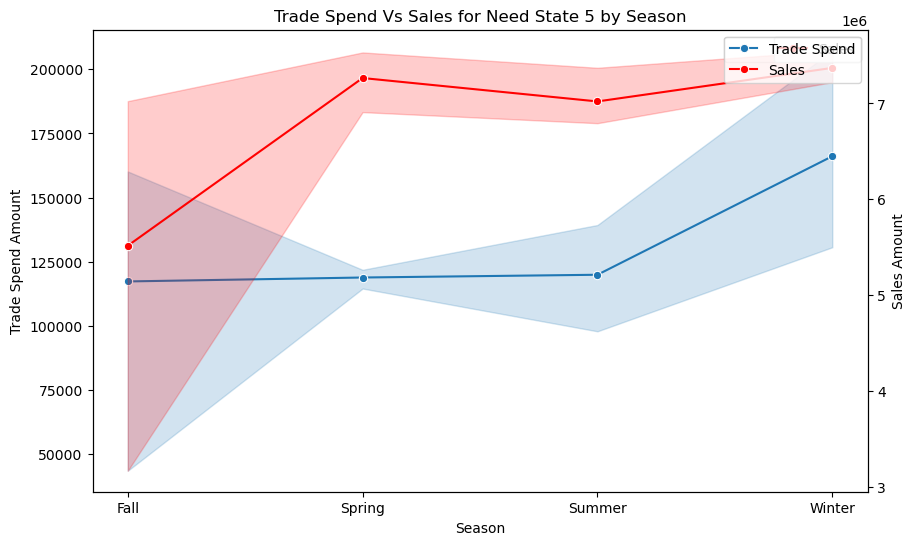

In [25]:
plt.figure(figsize=(10, 6))

# Create the first y-axis for Trade Spend
ax = sns.lineplot(data=merged_df_5, x='Season', y='Need State 5_TradeSpend', marker='o', label='Trade Spend')
ax.set_ylabel('Trade Spend Amount')

# Create the second y-axis for Sales
ax2 = ax.twinx()
sns.lineplot(data=merged_df_5, x='Season', y='Need State 5_Sales', marker='o', label='Sales', color='r', ax=ax2)
ax2.set_ylabel('Sales Amount')

plt.title('Trade Spend Vs Sales for Need State 5 by Season')
ax.figure.legend(loc='upper right', bbox_to_anchor=(1, 1), bbox_transform=ax.transAxes)
plt.show()

In [26]:
# Example for Need State 5
data = merged_df_5[['Need State 5_TradeSpend', 'Need State 5_Sales']]
# Defining the independent variable (X) and dependent variable (y)
X = data['Need State 5_TradeSpend']
y = data['Need State 5_Sales']

# Adding a constant to the model (for intercept)
X = sm.add_constant(X)

# Building the OLS model
model = sm.OLS(y, X).fit()

# Viewing the summary of the model
print(model.summary())
data = merged_df_5[['Need State 5_TradeSpend', 'Need State 5_Sales']]

                            OLS Regression Results                            
Dep. Variable:     Need State 5_Sales   R-squared:                       0.372
Model:                            OLS   Adj. R-squared:                  0.309
Method:                 Least Squares   F-statistic:                     5.928
Date:                Tue, 28 Nov 2023   Prob (F-statistic):             0.0352
Time:                        03:20:41   Log-Likelihood:                -182.20
No. Observations:                  12   AIC:                             368.4
Df Residuals:                      10   BIC:                             369.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

C:\Users\jeff13309\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [126]:
dfECOM["Season"] = dfECOM["Fiscal Week"].apply(categorize_season)

In [127]:
seasonal_analysis = df_melted.groupby('Season')['Ecomm POS'].sum().reset_index()
print(seasonal_analysis)


   Season   Ecomm POS
0    Fall   985485.75
1  Spring  1819866.00
2  Summer  1285947.75
3  Winter  1710198.00


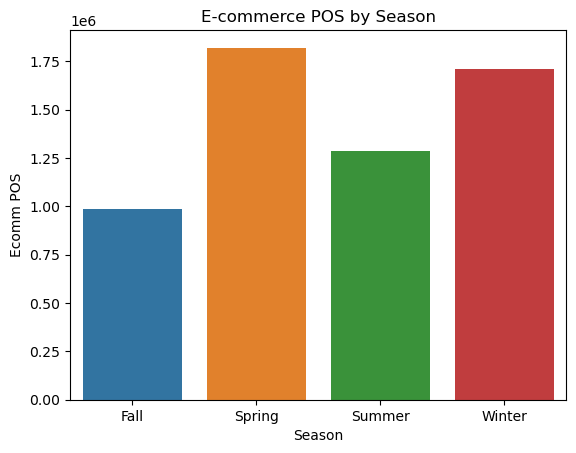

In [148]:
sns.barplot(x='Season', y='Ecomm POS', data=seasonal_analysis)
plt.title('E-commerce POS by Season')
plt.show()

In [139]:
print(df_melted)

       Need State  Fiscal Year  Fiscal Week Ecomm POS  Season
19     Need State  Fiscal Year            1       2.0  Winter
20   Need State 1         2021            1   3426.75  Winter
21   Need State 1         2022            1    3657.0  Winter
22   Need State 1         2023            1   2919.75  Winter
23   Need State 2         2021            1  12698.25  Winter
..            ...          ...          ...       ...     ...
983  Need State 5         2022           51    795.75  Winter
984  Need State 5         2023           51       0.0  Winter
985  Need State 6         2021           51   5531.25  Winter
986  Need State 6         2022           51   5622.75  Winter
987  Need State 6         2023           51       0.0  Winter

[969 rows x 5 columns]


In [133]:
print(seasonal_analysis)

   Season   Ecomm POS
0    Fall   985485.75
1  Spring  1819866.00
2  Summer  1285947.75
3  Winter  1710198.00


In [155]:
df_melted = pd.melt(dfECOM, id_vars=['Unnamed: 0', 'Unnamed: 1'], 
                    var_name='Fiscal Week', value_name='Ecomm POS')


df_melted['Fiscal Week'] = df_melted['Fiscal Week'].str.extract('(\d+)')
df_melted.dropna(subset=['Fiscal Week'], inplace=True)
df_melted['Fiscal Week'] = df_melted['Fiscal Week'].astype(int)

def categorize_season(week):
    if 1 <= week <= 13 or 50 <= week <= 52:
        return 'Winter'
    elif 15 <= week <= 26:
        return 'Spring'
    elif 27 <= week <= 38:
        return 'Summer'
    else:
        return 'Fall'

df_melted['Season'] = df_melted['Fiscal Week'].apply(categorize_season)

def categorize_season(week):
    if 1 <= week <= 13 or 50 <= week <= 52:
        return 'Winter'
    elif 15 <= week <= 26:
        return 'Spring'
    elif 27 <= week <= 38:
        return 'Summer'
    else:
        return 'Fall'

df_melted['Season'] = df_melted['Fiscal Week'].apply(categorize_season)

In [156]:
# Print the column names to verify the correct identifiers
print(dfECOM.columns)

Index(['Unnamed: 0', 'Unnamed: 1', 'Fiscal Week', 'Fiscal Week.1',
       'Fiscal Week.2', 'Fiscal Week.3', 'Fiscal Week.4', 'Fiscal Week.5',
       'Fiscal Week.6', 'Fiscal Week.7', 'Fiscal Week.8', 'Fiscal Week.9',
       'Fiscal Week.10', 'Fiscal Week.11', 'Fiscal Week.12', 'Fiscal Week.13',
       'Fiscal Week.14', 'Fiscal Week.15', 'Fiscal Week.16', 'Fiscal Week.17',
       'Fiscal Week.18', 'Fiscal Week.19', 'Fiscal Week.20', 'Fiscal Week.21',
       'Fiscal Week.22', 'Fiscal Week.23', 'Fiscal Week.24', 'Fiscal Week.25',
       'Fiscal Week.26', 'Fiscal Week.27', 'Fiscal Week.28', 'Fiscal Week.29',
       'Fiscal Week.30', 'Fiscal Week.31', 'Fiscal Week.32', 'Fiscal Week.33',
       'Fiscal Week.34', 'Fiscal Week.35', 'Fiscal Week.36', 'Fiscal Week.37',
       'Fiscal Week.38', 'Fiscal Week.39', 'Fiscal Week.40', 'Fiscal Week.41',
       'Fiscal Week.42', 'Fiscal Week.43', 'Fiscal Week.44', 'Fiscal Week.45',
       'Fiscal Week.46', 'Fiscal Week.47', 'Fiscal Week.48', 'Fiscal Wee

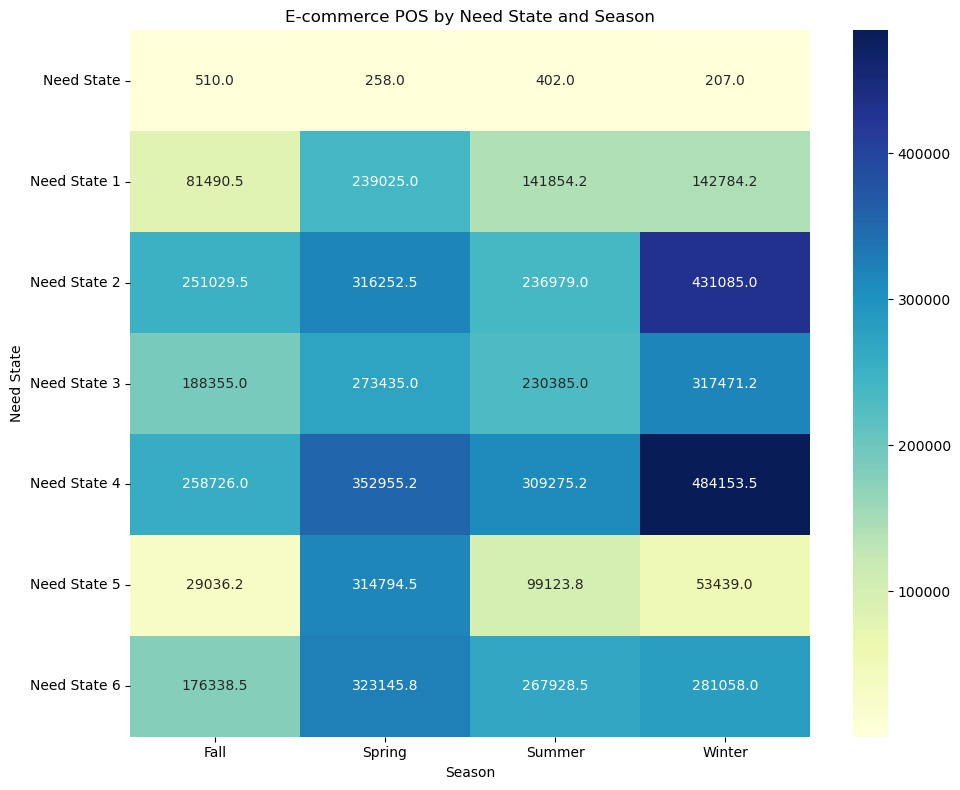

In [180]:
# Create a pivot table for visualization
pivot_table = seasonal_analysis.pivot(index='Need State', columns='Season', values='Ecomm POS')

# Generate the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, fmt='.1f', cmap='YlGnBu')
plt.title('E-commerce POS by Need State and Season')
plt.ylabel('Need State')
plt.xlabel('Season')
plt.tight_layout()  # Adjust the layout for better appearance
plt.show()


In [181]:
# Rename columns first
dfFactory.rename(columns={'Unnamed: 0': 'Need State', 'Unnamed: 1': 'Fiscal Week'}, inplace=True)

# Convert 'Fiscal Week' to numeric
dfFactory['Fiscal Week'] = pd.to_numeric(dfFactory['Fiscal Week'], errors='coerce')

# Define the function to categorize weeks into seasons
def categorize_season(week):
    # ... (season categorization logic)

# Apply the categorize_season function to 'Fiscal Week' column
    dfFactory['Season'] = dfFactory['Fiscal Week'].apply(categorize_season)




In [182]:
# Melt the DataFrame
df_melted = dfFactory.melt(id_vars=['Need State', 'Fiscal Week'], var_name='Fiscal Year', value_name='Ecomm POS')

# Ensure 'Ecomm POS' is numeric
df_melted['Ecomm POS'] = pd.to_numeric(df_melted['Ecomm POS'], errors='coerce')

# Drop NaN values if there were any non-numeric values that got converted to NaN
df_melted.dropna(subset=['Ecomm POS'], inplace=True)


In [183]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assume dfFactory is your initial DataFrame after loading the data
# Rename columns first to ensure they match what we expect
dfFactory.rename(columns={'Unnamed: 0': 'Need State', 'Unnamed: 1': 'Fiscal Week'}, inplace=True)

# Convert 'Fiscal Week' to numeric
dfFactory['Fiscal Week'] = pd.to_numeric(dfFactory['Fiscal Week'], errors='coerce')

# Define the function to categorize weeks into seasons
def categorize_season(week):
    if 1 <= week <= 13 or 50 <= week <= 52:
        return 'Winter'
    elif 14 <= week <= 26:
        return 'Spring'
    elif 27 <= week <= 39:
        return 'Summer'
    elif 40 <= week <= 49:
        return 'Fall'
    else:
        return 'Unknown'  # For any other case

# Apply the categorize_season function to 'Fiscal Week' column
dfFactory['Season'] = dfFactory['Fiscal Week'].apply(categorize_season)

# Check if 'Season' column exists and its unique values to ensure it's correct
print('Season column in dfFactory:', 'Season' in dfFactory.columns)
print('Unique seasons:', dfFactory['Season'].unique())

# Melt the DataFrame to long format
df_melted = dfFactory.melt(id_vars=['Need State', 'Fiscal Week'], var_name='Fiscal Year', value_name='Ecomm POS')

# Ensure 'Ecomm POS' is numeric
df_melted['Ecomm POS'] = pd.to_numeric(df_melted['Ecomm POS'], errors='coerce')

# Drop NaN values if there were any non-numeric values that got converted to NaN
df_melted.dropna(subset=['Ecomm POS'], inplace=True)

# Verify that the 'Season' column exists after melting and before grouping
print('Season column in df_melted:', 'Season' in df_melted.columns)



Season column in dfFactory: True
Unique seasons: ['Unknown' 'Winter' 'Spring' 'Summer' 'Fall']
Season column in df_melted: False


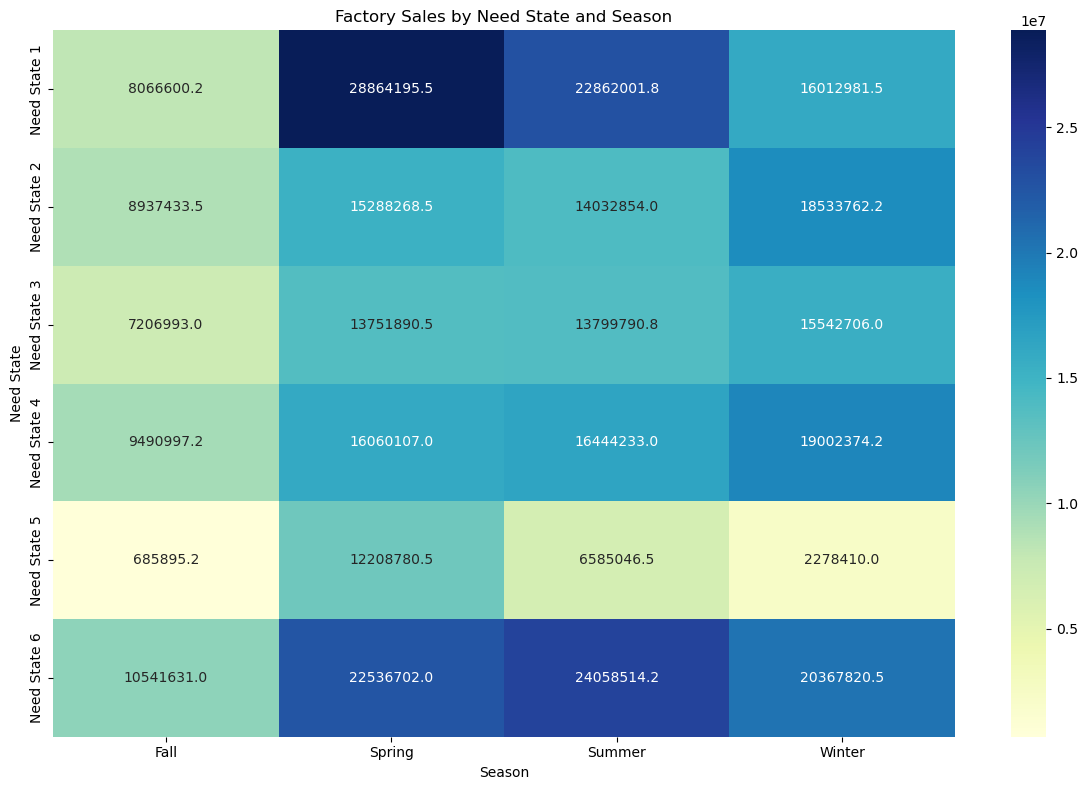

In [184]:
import numpy as np
# Rename columns first
dfFactory.rename(columns={'Unnamed: 0': 'Need State', 'Unnamed: 1': 'Fiscal Week'}, inplace=True)

# Convert 'Fiscal Week' to numeric
dfFactory['Fiscal Week'] = pd.to_numeric(dfFactory['Fiscal Week'], errors='coerce')

# Define the function to categorize weeks into seasons
def categorize_season(week):
    if pd.isna(week):
        return np.nan  # Skip NaN values
    elif 1 <= week <= 13 or 50 <= week <= 52:
        return 'Winter'
    elif 14 <= week <= 26:
        return 'Spring'
    elif 27 <= week <= 39:
        return 'Summer'
    elif 40 <= week <= 49:
        return 'Fall'

# Apply the categorize_season function
dfFactory['Season'] = dfFactory['Fiscal Week'].apply(categorize_season)

# Melt the DataFrame
df_melted = dfFactory.melt(id_vars=['Need State', 'Fiscal Week', 'Season'], 
                           var_name='Fiscal Year', value_name='Sales')

# Ensure 'Sales' is numeric
df_melted['Sales'] = pd.to_numeric(df_melted['Sales'], errors='coerce')

# Drop NaN values
df_melted.dropna(subset=['Sales'], inplace=True)

# Group by 'Need State' and 'Season' and sum the 'Sales'
grouped = df_melted.groupby(['Need State', 'Season'])['Sales'].sum().reset_index()

# Create pivot table for heatmap
pivot_table = grouped.pivot(index='Need State', columns='Season', values='Sales')

# Generate heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt='.1f', cmap='YlGnBu')
plt.title('Factory Sales by Need State and Season')
plt.xlabel('Season')
plt.ylabel('Need State')
plt.tight_layout()
plt.show()
